## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [122]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import randint

## Overview

In [2]:
bank = pd.read_csv("BankChurners.csv")

In [3]:
df = bank.copy()

In [4]:
df.shape

(10127, 21)

In [5]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [6]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

- This dataset has 10127 rows and 21 columns.
- Attrition_Flag is the target variable.
- It seems Credit_Limit = Total_Revolving_Bal + Avg_Open_To_Buy. If so, one of these columns is redundant. We may drop it.

**Check data types and missing values.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- No missing values in any column.

**Let's check the number of unique values in each column.**

In [9]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- The number of unique values in CLIENTNUM is the same as the size of the dataset. The Client number won't provide useful information to our model. We could drop it.

In [10]:
df.drop(columns = ["CLIENTNUM"], inplace = True)

**Let's check the relationship of Credit_Limit, Total_Revolving_Bal and Avg_Open_To_Buy.**

In [11]:
np.sum(df.Credit_Limit == (df.Total_Revolving_Bal + df.Avg_Open_To_Buy))

10127

It turns out that all 10127 observations meet the relationship. Let's drop the Avg_Open_To_Buy column.

In [12]:
df.drop(columns = ["Avg_Open_To_Buy"], inplace = True)

**Data Summary**

In [13]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [14]:
df.describe(include = ['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

- The mean and median of `Customer_Age`, `Dependent_count`, `Months_on_book`, `Total_Relationship_Count`, `Total_Amt_Chng_Q4_Q1`,  `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` are almost the same.
- According to Months_on_book, all the clients have maintained at least 1 year of relationship with our bank.
- `Credit_Limit` and `Total_Trans_Amt` have a wide range and they are right-skewed.
- `Total_Revolving_Bal` has a wide range and is left-skewed.

## Univariate Analysis

In [15]:
def histogram_and_boxplot(col):
    fig = plt.figure(figsize = (10,10))
    gs0 = matplotlib.gridspec.GridSpec(2,1, figure=fig, hspace = 0.3)

    ax1 = fig.add_subplot(gs0[0])
    ax2 = fig.add_subplot(gs0[1])

    sns.histplot(ax=ax1, data = df[col], kde = True);
    sns.boxplot(ax=ax2, x = df[col], color ="violet", showmeans = True );

**Customer_Age**

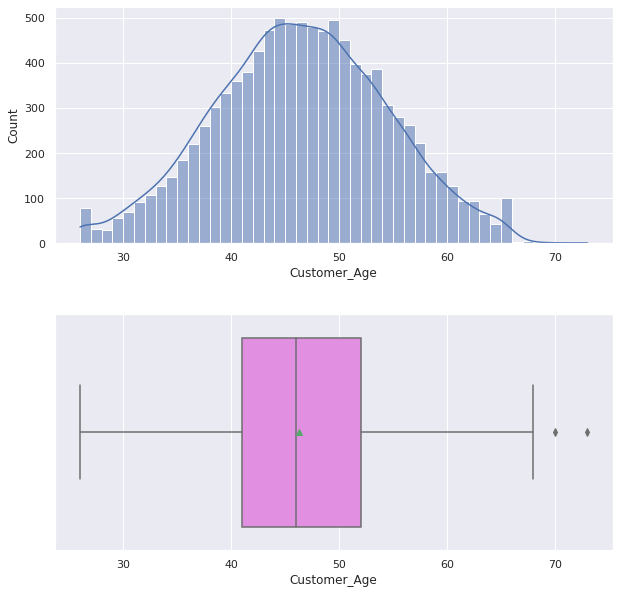

In [16]:
histogram_and_boxplot("Customer_Age")

`Customer_Age` is approximately normal distribution, with a few outliers on the right.

**Months_on_book**

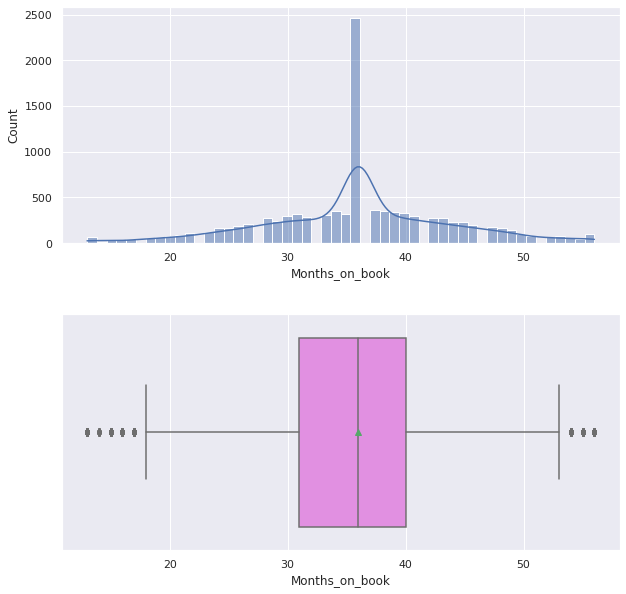

In [17]:
histogram_and_boxplot("Months_on_book")

Most clients established the relationship with our bank 36 months ago. But we also see outliers on both sides.

**Credit_Limit**

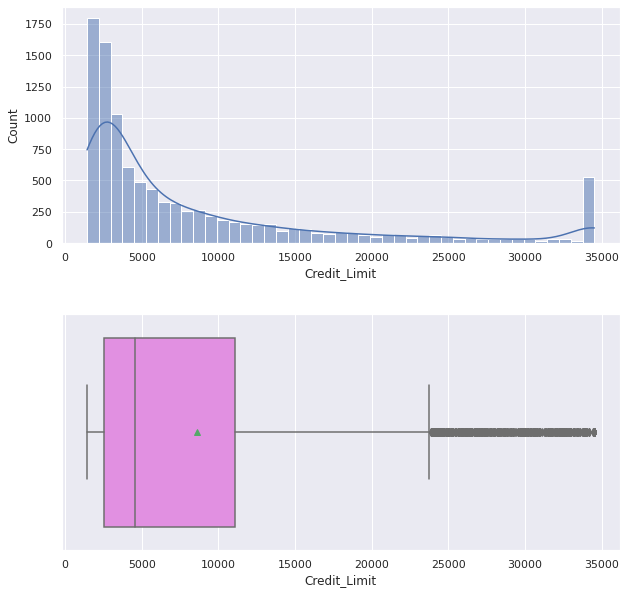

In [18]:
histogram_and_boxplot("Credit_Limit")

More than 50% of clients have credit limit under \\$5000. At the same time, lots of outliers have more than \\$25000 credit limit.

**Total_Revolving_Bal**

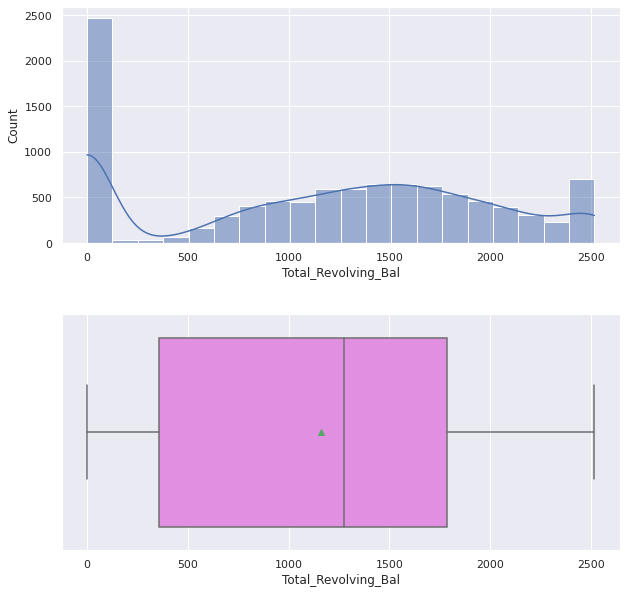

In [19]:
histogram_and_boxplot("Total_Revolving_Bal")

Lots of clients have zero revolving balance. There's a nearly uniform distribution between \\$500 and \\$2500.

**Total_Amt_Chng_Q4_Q1**

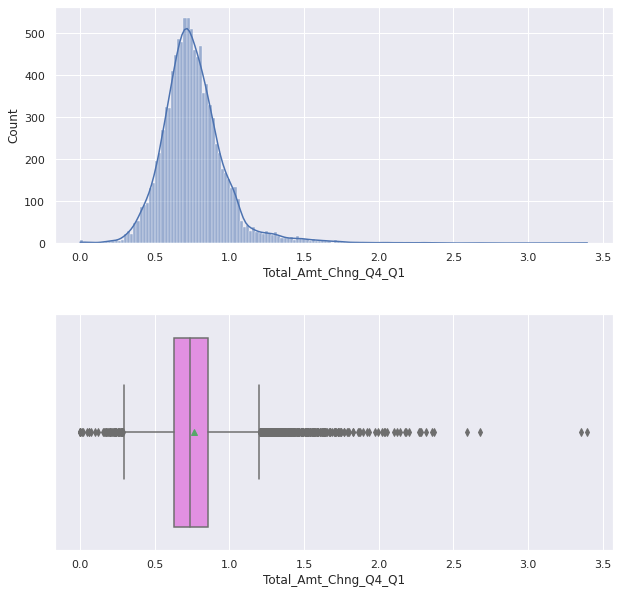

In [20]:
histogram_and_boxplot("Total_Amt_Chng_Q4_Q1")

The distributions is nearly symmetric except a bunch of outliers on both sides.

**Total_Trans_Amt**

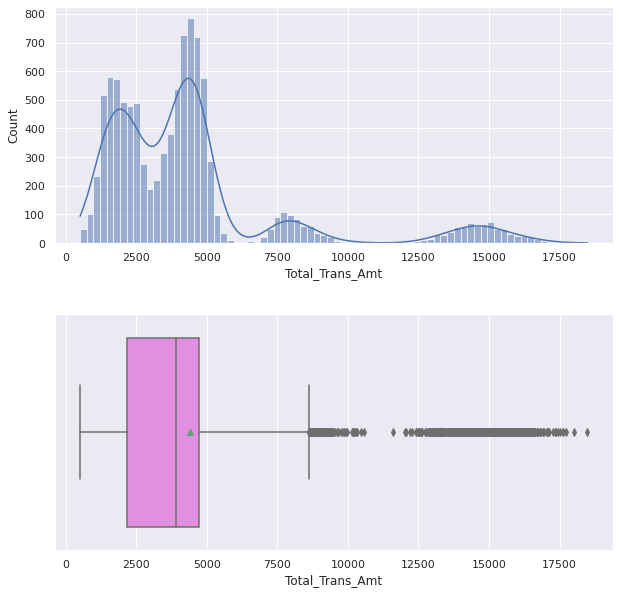

In [21]:
histogram_and_boxplot("Total_Trans_Amt")

Most clients have less than \\$5000 of Total Transaction Amount (Last 12 months), with lots of outliers on the right.

**Total_Trans_Ct**

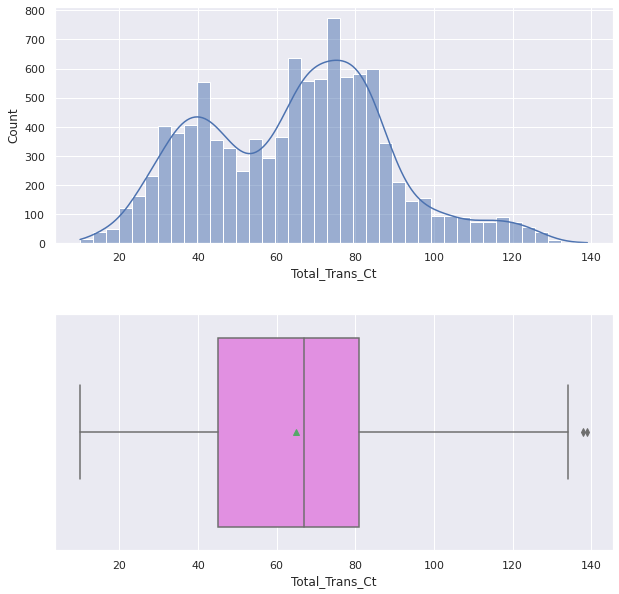

In [22]:
histogram_and_boxplot("Total_Trans_Ct")

Mean and median are almost the same, with few outliers on the right.

**Total_Ct_Chng_Q4_Q1**

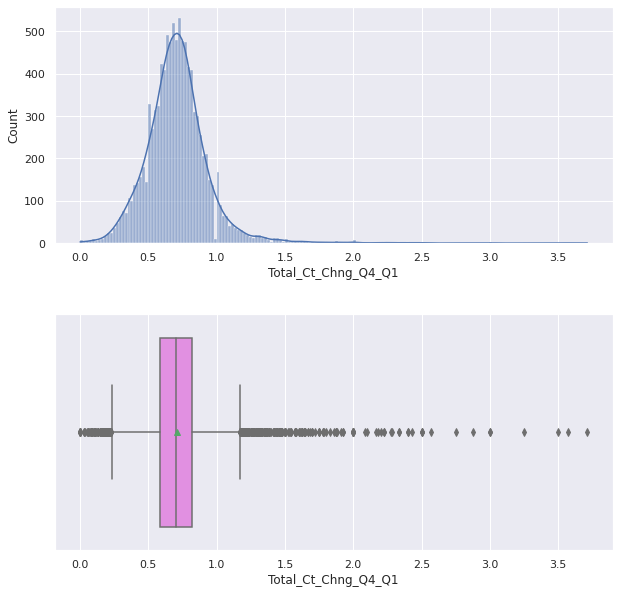

In [23]:
histogram_and_boxplot("Total_Ct_Chng_Q4_Q1")

The distributions is nearly symmetric except a bunch of outliers on both sides.

**Avg_Utilization_Ratio**

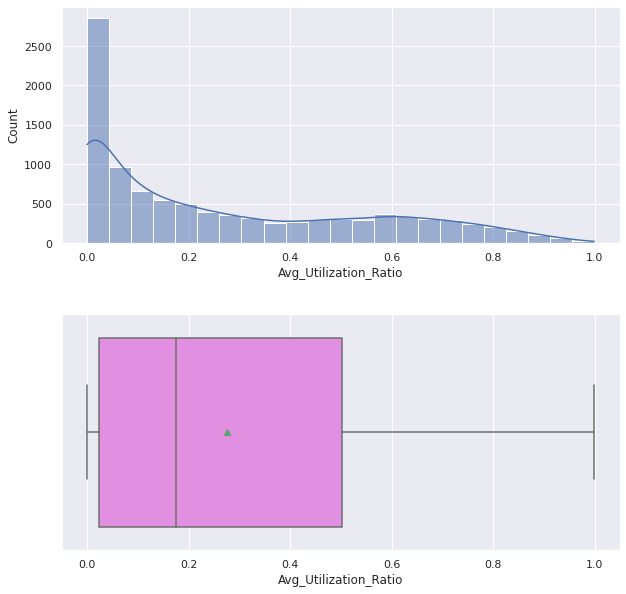

In [24]:
histogram_and_boxplot("Avg_Utilization_Ratio")

`Avg_Utilization_Ratio` for most clients is less than 0.2, which indicates a low/moderate unitlization ratio and a healthy financial condition.

In [25]:
def countplot_with_percent(col):
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x = col, data = df);
    for p in ax.patches:
        percent = round(p.get_height()/ df.shape[0] * 100, 2)
        x, y = p.get_width()/2 + p.get_x() - 0.3, p.get_height() + p.get_y() + 0.1
        ax.annotate(str(percent) + "%", (x,y), fontsize = 12)

**Dependent_count**

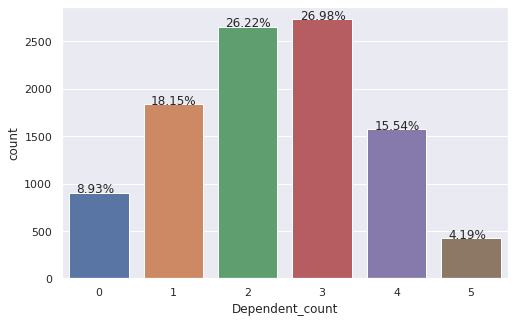

In [26]:
countplot_with_percent("Dependent_count")

More than 50% customers have 2 or 3 depdendents. Only 4.2% of them have 5 dependents.

**Total_Relationship_Count**

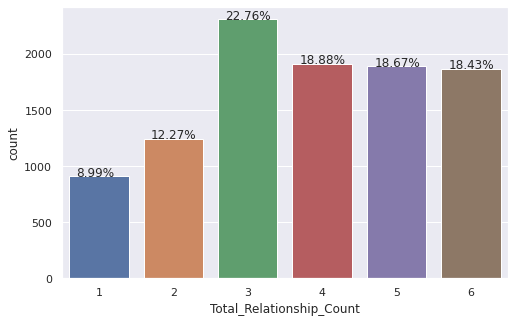

In [27]:
countplot_with_percent("Total_Relationship_Count")

About 80% of customers hold three or more of our products.

**Months_Inactive_12_mon**

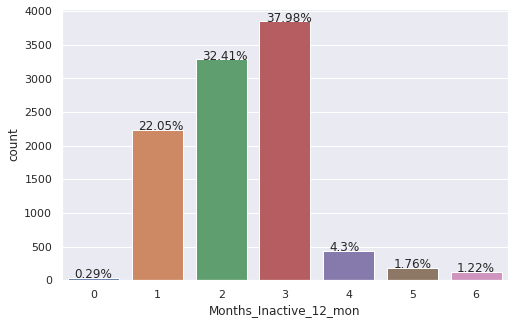

In [28]:
countplot_with_percent("Months_Inactive_12_mon")

Most clients have 1- 3 inactive months in the last 12 months.

**Contacts_Count_12_mon**

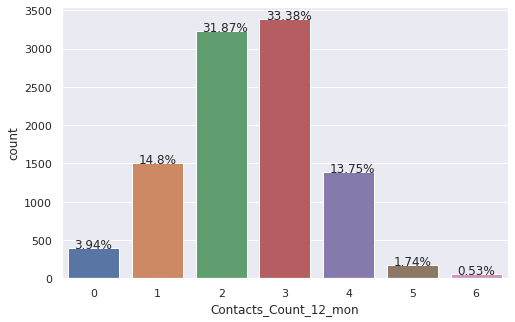

In [29]:
countplot_with_percent("Contacts_Count_12_mon")

Most clients contacted our bank 2-3 times during the past 12 months.

**Attrition_Flag**

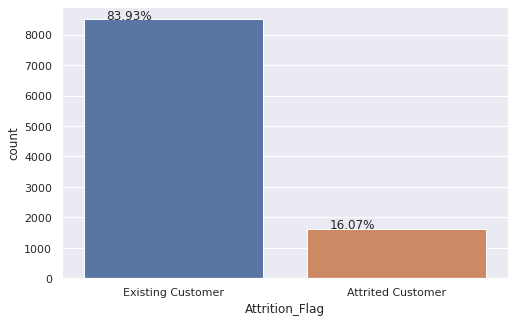

In [30]:
countplot_with_percent("Attrition_Flag")

It's an imbalanced dataset with more existing customers than attrited customers. Churn rate is 16.07%.

**Gender**

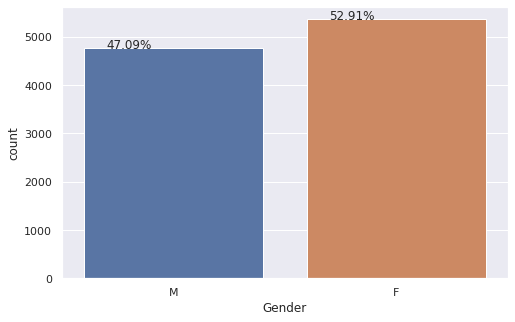

In [31]:
countplot_with_percent("Gender")

Female accounts for 53% of the total customers.

**Education_Level**

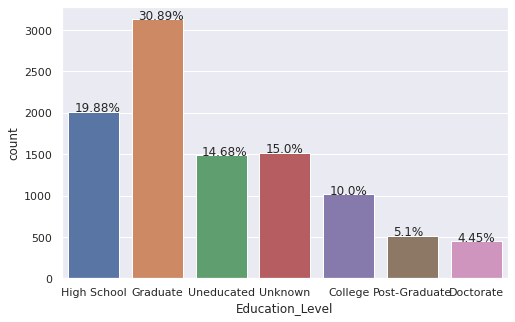

In [32]:
countplot_with_percent("Education_Level")

Graduate accounts for 30.89% of total observations, which is the most common education level, followed by High School. "Unknown" accounts for 15% of total observations.

**Marital_Status**

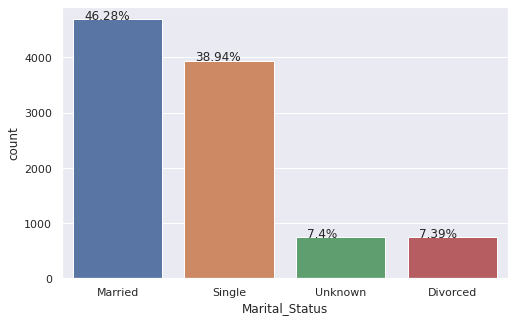

In [33]:
countplot_with_percent("Marital_Status")

Married people accounts for 46% of the total customers, followed by Single which is 39%. "Unknown" accounts for 7.4% of total observations.

**Income_Category**

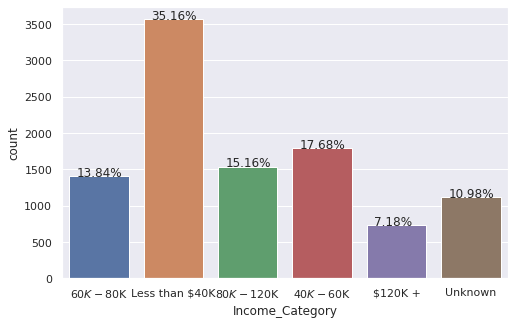

In [34]:
countplot_with_percent("Income_Category")

People with income less than \\$40K account for 35% of the total customers, followed by those with income between 40K-60K accounting for 17.68%. "Unknown" accounts for 10.98% of total observations.

**Card_Category**

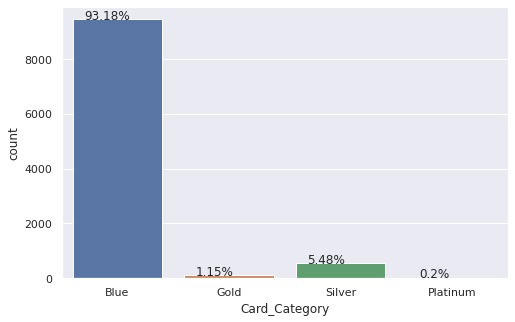

In [35]:
countplot_with_percent("Card_Category")

93.18% of clients hold Blue card. Few hold Platinum card and Gold card.

## Bivariate Analysis

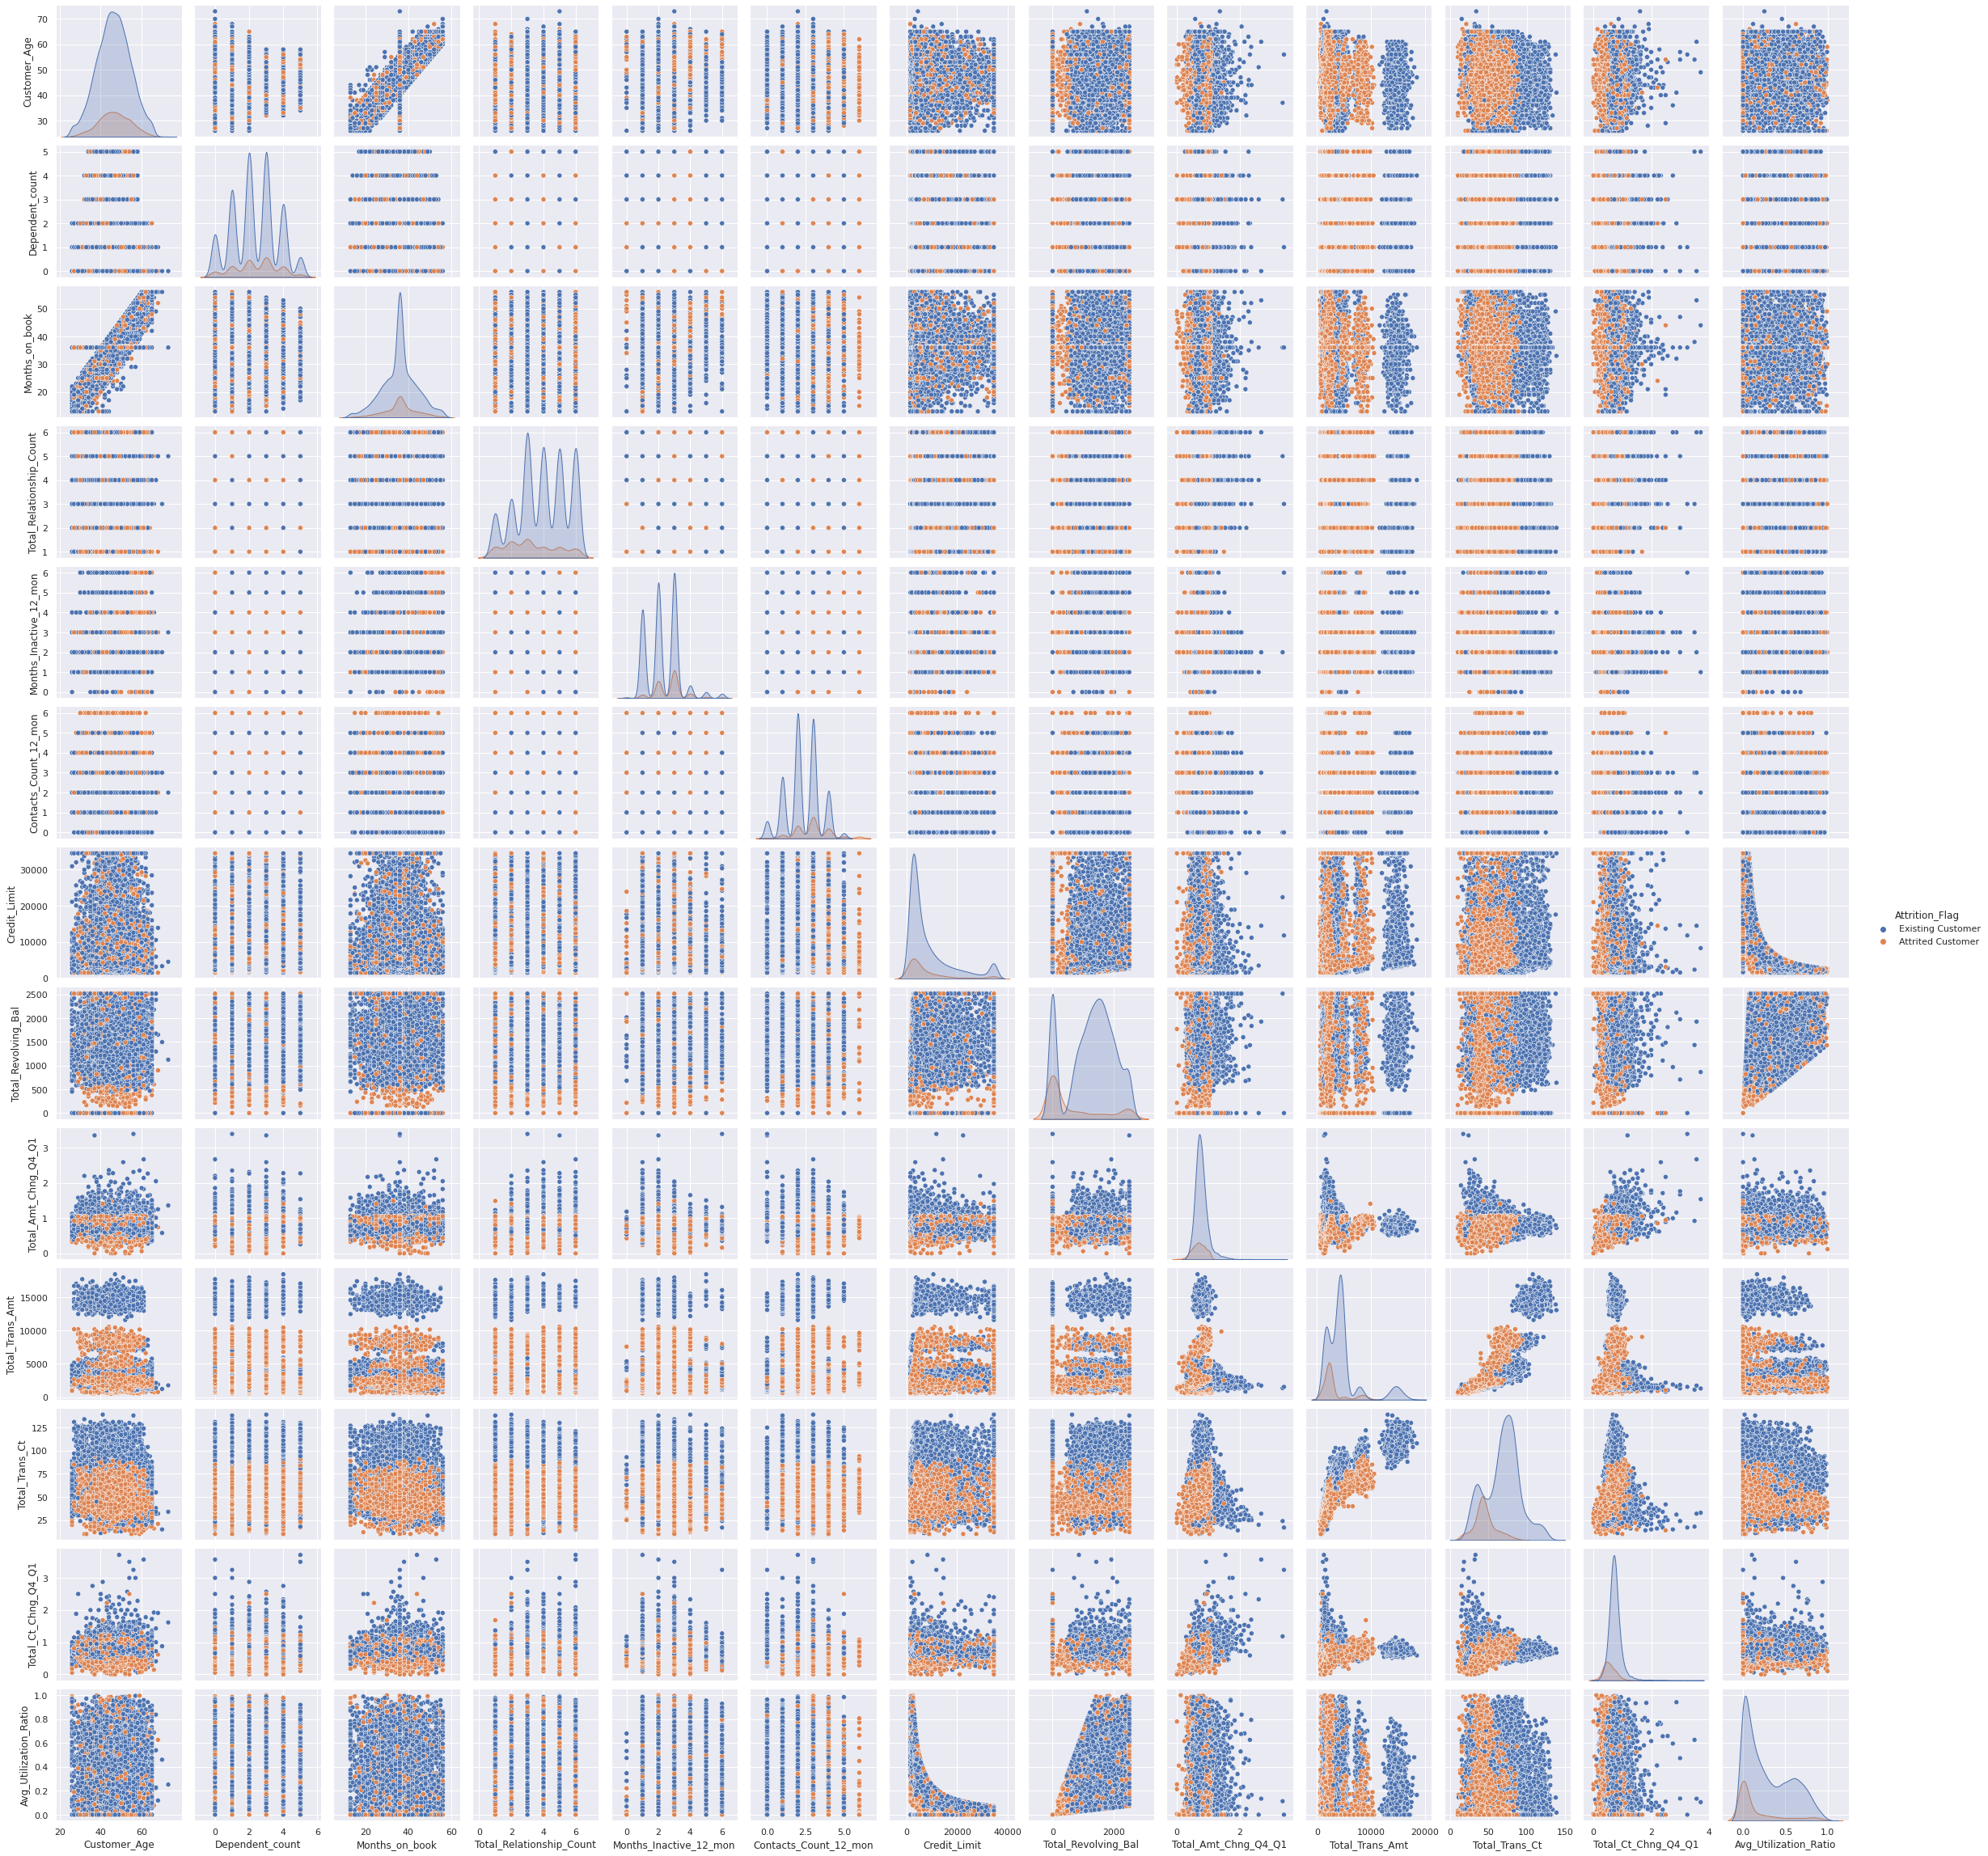

In [36]:
sns.pairplot(data = df, diag_kind = "kde", hue = "Attrition_Flag");

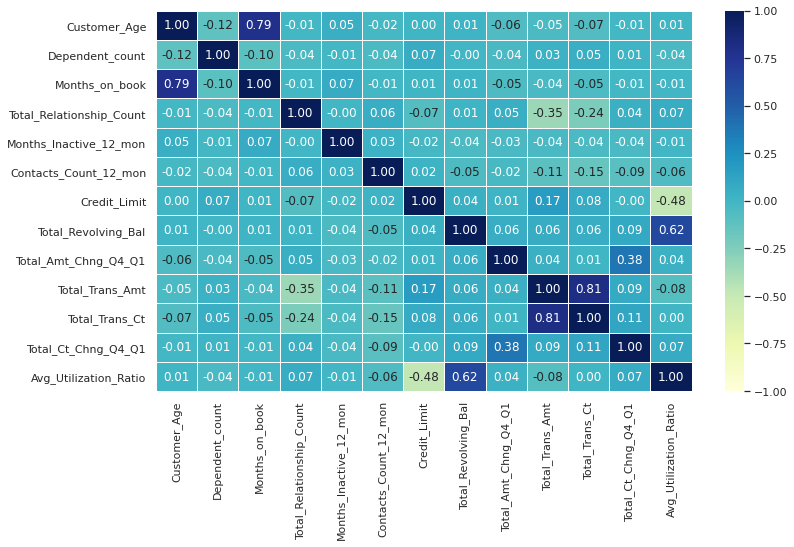

In [37]:
plt.figure(figsize = (12,7));
sns.heatmap(data = df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f",cmap = "YlGnBu", linewidths=.5);

- `Customer_Age` is positively correlated to `Months_on_book`.
- `Total_Trans_Amt` is negatively correlated to `Total_Relationship_Count` and positively correlated to `Total_Trans_Ct`.
- `Avg_Utilization_Ratio` is negatively correlated to `Credit_Limit` and positively correlated to `Total_Revolving_Bal`.
- `Total_Amt_Chng_Q4_Q1` is positively correlated to `Total_Ct_Chng_Q4_Q1`.


**Let's further investigate bivariate relationships.**

### Attrition_Flag vs Customer_Age

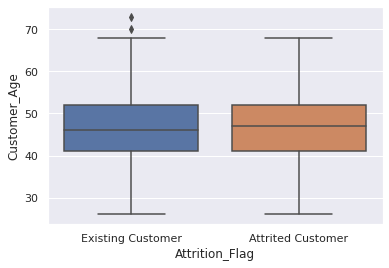

In [38]:
sns.boxplot(x = "Attrition_Flag", y = "Customer_Age", data = df);

No difference in customer age between churned and non-churned groups. 

### Attrition_Flag vs Months_on_book

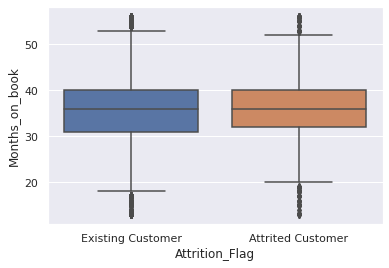

In [39]:
sns.boxplot(x = "Attrition_Flag", y = "Months_on_book", data = df);

No difference in Months_on_book between churned and non-churned groups.

### Attrition_Flag vs Total_Relationship_Count

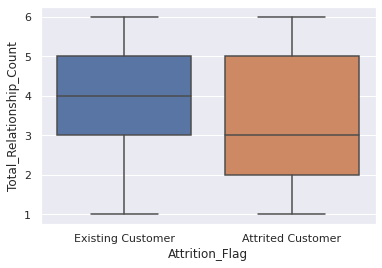

In [40]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Relationship_Count", data = df);

Churned customers hold fewer products from our bank compared to non-churned groups.

### Attrition_Flag vs Dependent_count

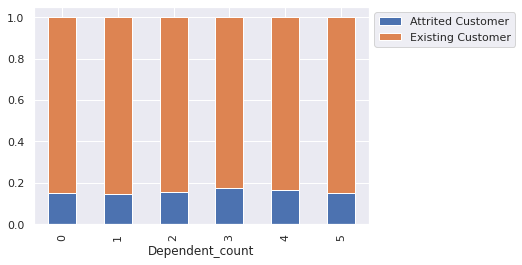

In [41]:
pd.crosstab(index = df.Dependent_count, columns = df.Attrition_Flag, normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Churn rate is almost the same among groups with different number of dependents.

### Attrition_Flag vs Months_Inactive_12_mon

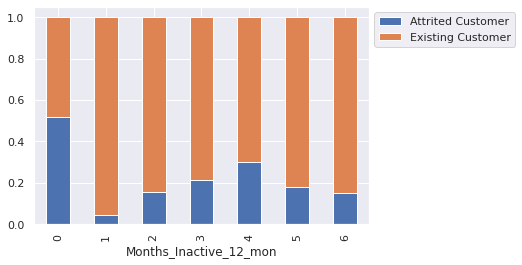

In [42]:
pd.crosstab(index = df.Months_Inactive_12_mon, columns = df.Attrition_Flag, normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- Surprisingly, the churn rate is the highest for customers that're inactive for 0 month and lowest for customers that're inactive for 1 month.
- Customers inactive for 4 months are the category with the second highest churn rate.

### Attrition_Flag vs Contacts_Count_12_mon

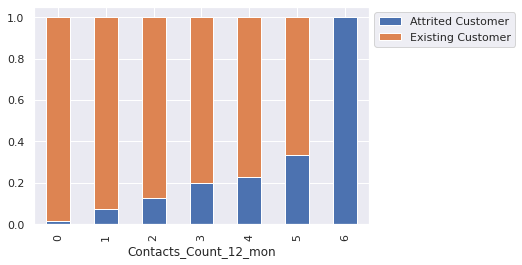

In [43]:
pd.crosstab(index = df.Contacts_Count_12_mon, columns = df.Attrition_Flag, normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- The churn rate increases with the number of contacts made by customer during the last 12 months.When the number of contacts reaches 6, churn rate is 100%.
- It may indicate that customers are driven by negative experience to contact our bank. We need to investigate and resolve their concerns.

### Attrition_Flag vs Credit_Limit, Total_Revolving_Bal, Avg_Utilization_Ratio

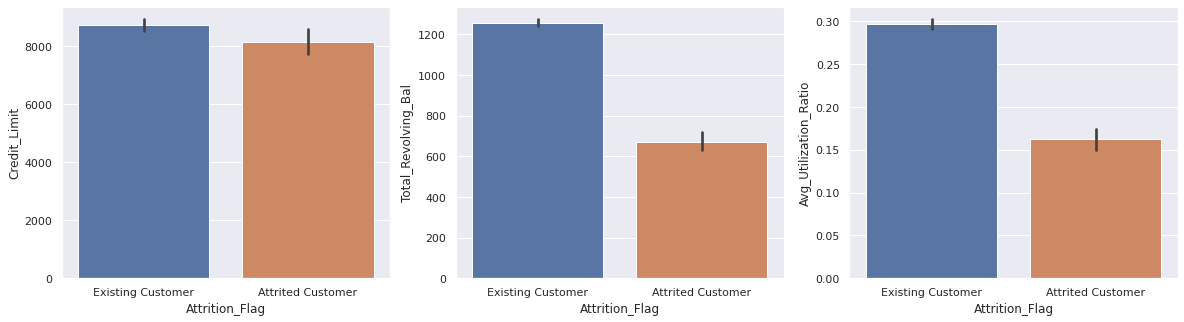

In [44]:
plt.figure(figsize = (20,5))
plt.subplot(1, 3,1);
sns.barplot(x = "Attrition_Flag", y = "Credit_Limit", data = df);
plt.subplot(1, 3, 2);
sns.barplot(x = "Attrition_Flag", y = "Total_Revolving_Bal", data = df);
plt.subplot(1, 3, 3);
sns.barplot(x = "Attrition_Flag", y = "Avg_Utilization_Ratio", data = df);

- The churned group has lower credit limit/ revolving balance/ average utilization ratio.

### Attrition_Flag vs Total_Trans_Amt, Total_Trans_Ct, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1

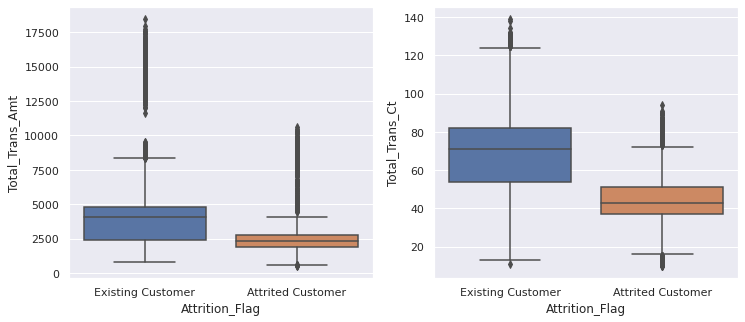

In [45]:
plt.figure(figsize = (12,5))
plt.subplot(1, 2,1);
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Amt", data = df);
plt.subplot(1, 2, 2);
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Ct", data = df);

The total transaction amount and the number of transactions for the past year is lower for churned group. 

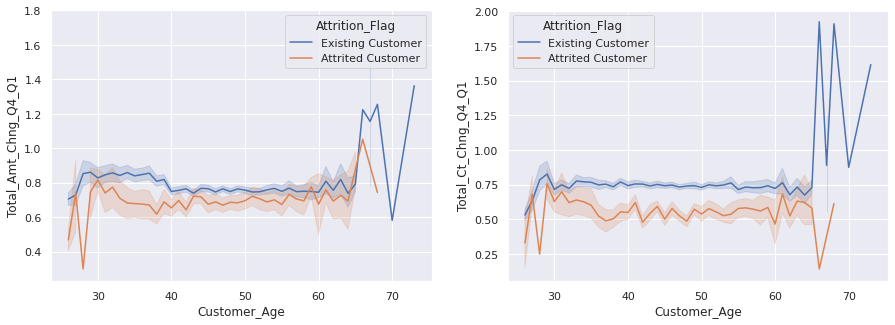

In [46]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2,1);
sns.lineplot(x = "Customer_Age", y = "Total_Amt_Chng_Q4_Q1", hue = "Attrition_Flag", data = df);
plt.subplot(1, 2, 2);
sns.lineplot(x = "Customer_Age", y = "Total_Ct_Chng_Q4_Q1", hue = "Attrition_Flag", data = df);

Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter is lower for churned group, as well as the ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, which indicates churned customers tend to use our credit card less than non-churned group.


### Attrition_Flag vs Gender

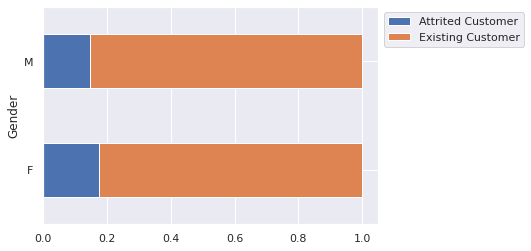

In [47]:
pd.crosstab(index = df.Gender, columns = df.Attrition_Flag, normalize = "index").plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Churn rate doesn't differ much between genders. It is slightly higher for female.

### Attrition_Flag vs Education_Level

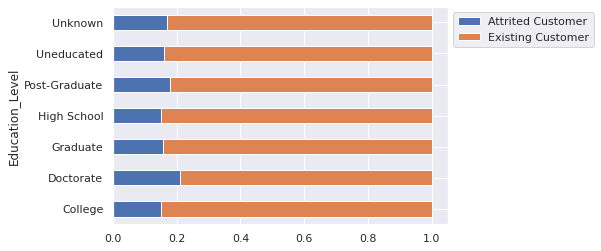

In [48]:
pd.crosstab(index = df.Education_Level, columns = df.Attrition_Flag, normalize = "index").plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Churn rate is the highest for customers with a doctor's degree, but it doesn't differ much for other education levels.

### Attrition_Flag vs Marital_Status

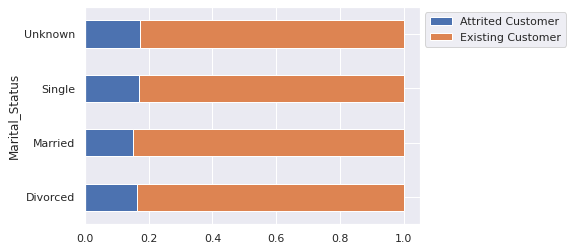

In [49]:
pd.crosstab(index = df.Marital_Status, columns = df.Attrition_Flag, normalize = "index").plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Churn rate doesn't differ much among different marital status.

### Attrition_Flag vs Income_Category

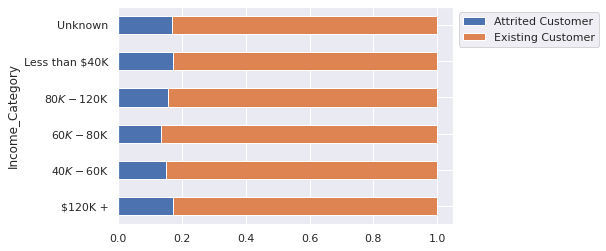

In [50]:
pd.crosstab(index = df.Income_Category, columns = df.Attrition_Flag, normalize = "index").plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Churn rate doesn't differ much among different income groups.

### Attrition_Flag vs Card_Category

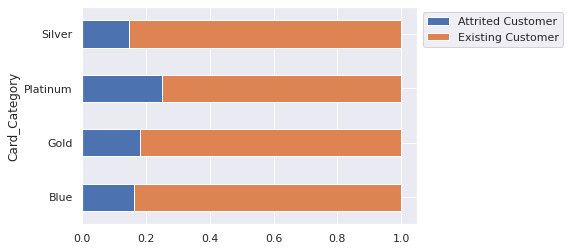

In [51]:
pd.crosstab(index = df.Card_Category, columns = df.Attrition_Flag, normalize = "index").plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Platinum card holders have the highest churn rate, but it doesn't differ much among other card holders.

### Card_Category vs Income_Category

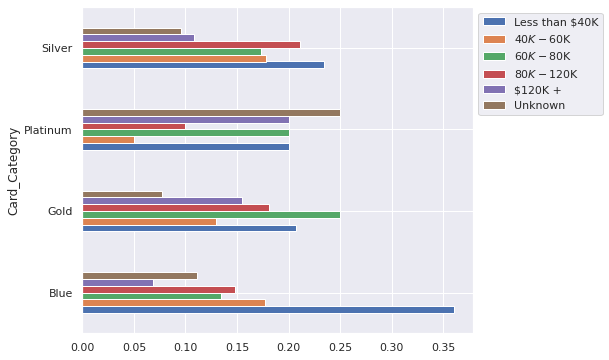

In [52]:
# sort Income_Category in ascending order
pd.crosstab(index = df.Card_Category, columns = df.Income_Category, normalize = "index")[['Less than $40K', '$40K - $60K', 
                                                                                          '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']].plot(kind = "barh", figsize = (7,6));
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- Customer with income less than 40K account for more than 35% of Blue card holders, which is the highest among all credit cards. It may indicate Blue card is a product for lower income customers.
- Among Platinum card holders, there are 20% from customers with income less than 40K and 5% from customers with income 40K - 60K. Both ratio are the lowest among all credit cards. On the other hand, customers with income more than 120K account for 20% of Platinum card holders, which is the highest compared to other credit cards. It may indicate Platinum card is more favored by customers with higher income.

### Card_Category vs Credit_Limit, Total_Revolving_Bal, Avg_Utilization_Ratio

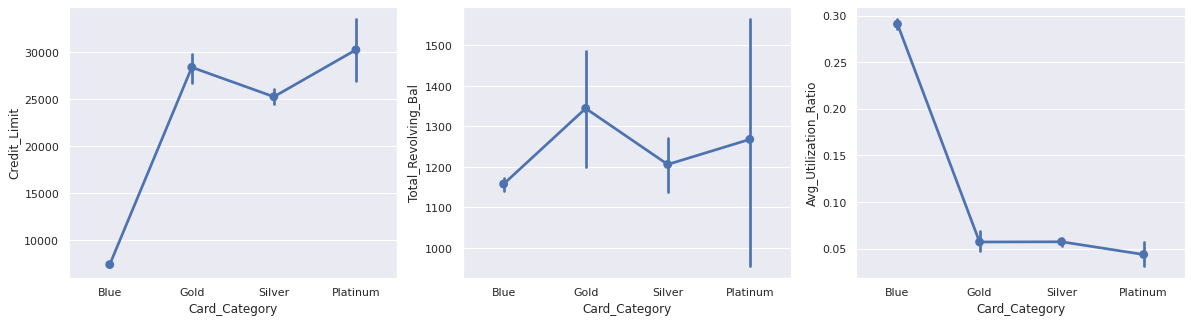

In [53]:
plt.figure(figsize = (20,5))
plt.subplot(131)
sns.pointplot(x = "Card_Category", y = "Credit_Limit", data = df);
plt.subplot(132)
sns.pointplot(x = "Card_Category", y = "Total_Revolving_Bal", data = df);
plt.subplot(133)
sns.pointplot(x = "Card_Category", y = "Avg_Utilization_Ratio", data = df);

- Credit limits for different credit card holders are: Platinum > Gold > Silver > Blue.
- Average revolving balance:Gold > Platinum > Silver > Blue.
- Blue card holders have much higher utilization ratio compared to other card holders.

### Card_Category vs Customer_Age

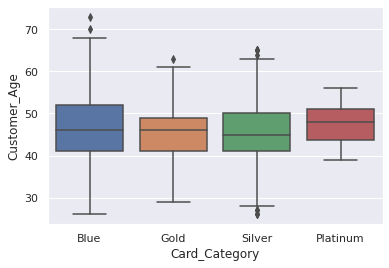

In [54]:
sns.boxplot(x = "Card_Category", y = "Customer_Age", data = df);

Platinum card has the highest median customer age and Silver card has the lowest median customer age.

### Card_Category vs Months_on_book

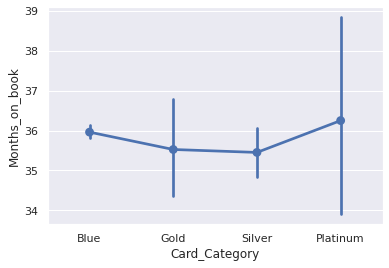

In [55]:
sns.pointplot(x = "Card_Category", y = "Months_on_book", data = df);

Platinum card holders have the longest average period of relationship with our bank, followed by Blue card holders.

### Card_Category vs Contacts_Count_12_mon

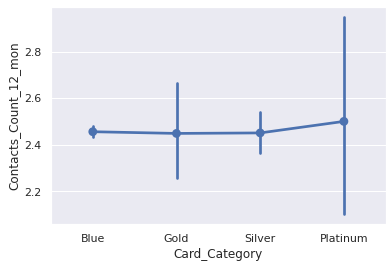

In [56]:
sns.pointplot(x = "Card_Category", y = "Contacts_Count_12_mon", data = df);

The average contacts per customer for Platinum card is slightly higher than others. 

### Card_Category vs Months_Inactive_12_mon

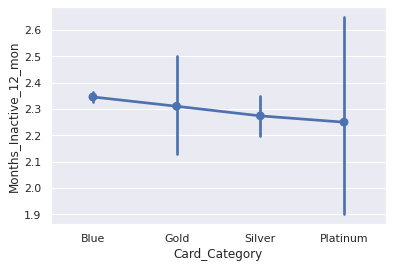

In [57]:
sns.pointplot(x = "Card_Category", y = "Months_Inactive_12_mon", data = df);

Blue card holders have the longest average inactive period. Platinum card holders have the shortest average inactive period.

### Card_Category vs Gender

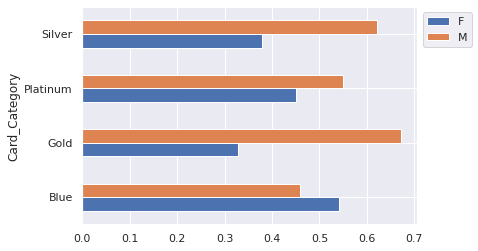

In [58]:
pd.crosstab(index = df.Card_Category, columns = df.Gender, normalize = "index").plot(kind = "barh", stacked = False);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Blue card has more female users than male users, while the other three have more male users. Gold card has the highest male/ female ratio.

### Card_Category vs Total_Trans_Amt, Total_Trans_Ct

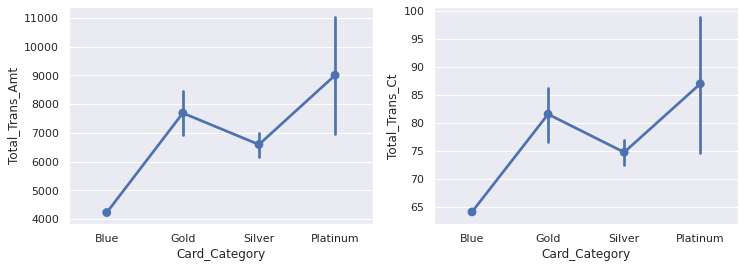

In [59]:
plt.figure(figsize = (12, 4));
plt.subplot(121)
sns.pointplot(x = "Card_Category", y = "Total_Trans_Amt", data = df);
plt.subplot(122)
sns.pointplot(x = "Card_Category", y = "Total_Trans_Ct", data = df);

Total transaction amount and total number of transactions during past year: Platinum > Gold > Silver > Blue.

### Card_Category vs Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1

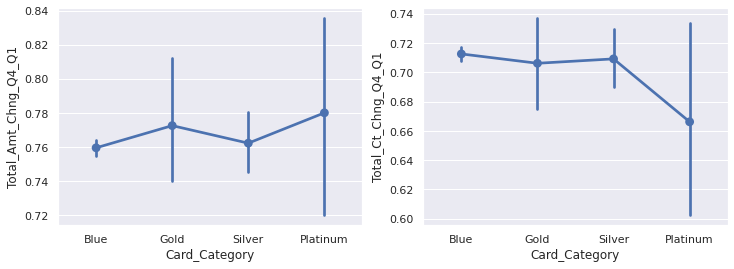

In [60]:
plt.figure(figsize = (12,4));
plt.subplot(121)
sns.pointplot(x = "Card_Category", y = "Total_Amt_Chng_Q4_Q1", data = df);
plt.subplot(122)
sns.pointplot(x = "Card_Category", y = "Total_Ct_Chng_Q4_Q1", data = df);

While `Total_Amt_Chng_Q4_Q1` is alike among all cards, `Total_Ct_Chng_Q4_Q1` for Platinum card is much lower.

### Card_Category vs Marital_Status

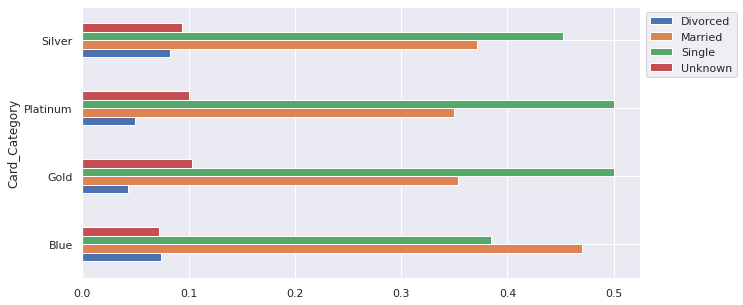

In [61]:
pd.crosstab(index = df.Card_Category, columns = df.Marital_Status, normalize = "index").plot(kind = "barh", stacked = False, figsize = (10,5));
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Married people and singles are the major users for each credit card. Blue card has more married users than singles, while the other three have more single users.

### Attrition_Flag vs Gender vs Credit_Limit

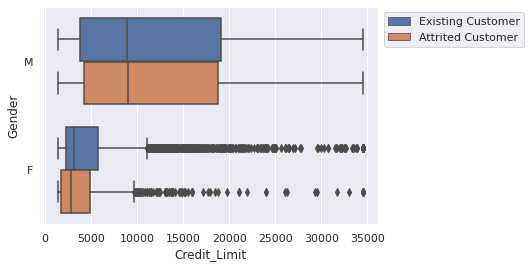

In [62]:
sns.boxplot(x = df.Credit_Limit, y = df.Gender, hue = df.Attrition_Flag, data = df);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- Female customers are assigned a lower credit limit in general, but there're also lots of outliers with very high credit limit.
- For male, churned and non-churned groups have similar distribution.
- For female, the churned group has lower credit limit than non-churned group.

### Income_Category vs Gender

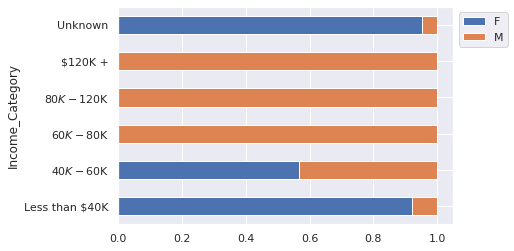

In [63]:
pd.crosstab(index = df.Income_Category, columns = df.Gender, normalize = "index").reindex(['Less than $40K', '$40K - $60K', 
                                                                                           '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']).plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- For the lower income group (Less than 60K), female is the majority. For the higher income group (more than 60K), male accounts for 100%. It shows a huge inequality of income between genders.
- For the unknown income group, female is the majority.

### Income_Category vs Credit_Limit

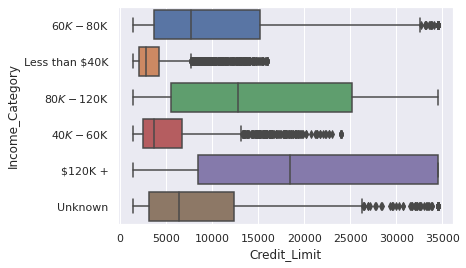

In [64]:
sns.boxplot(y = "Income_Category", x = "Credit_Limit", data = df);

- Credit limit increases with income. All income groups, except 80K-120K and 120K+, have lots of outliers on the right.
- Unknown income group has the third lowest income.

### Income_Category vs Gender vs Attrition_Flag

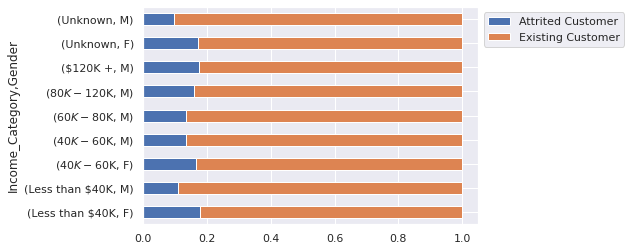

In [65]:
pd.crosstab(index = [df.Income_Category, df.Gender], columns = df.Attrition_Flag, normalize = "index").reindex(['Less than $40K', '$40K - $60K', 
                                                                                           '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'], level = 0).plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- For all income categories with female customers, females show higher churn rate than males.

### Card_Category vs Gender vs Attrition_Flag

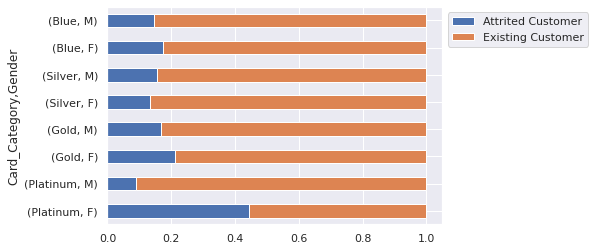

In [66]:
pd.crosstab(index = [df.Card_Category, df.Gender], columns = df.Attrition_Flag, normalize = "index").reindex(["Platinum", "Gold", 
                                                                                                              "Silver", "Blue"], level = 0).plot(kind = "barh", stacked = True);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

- For Platinum card, female is much more likely to churn, with a churn rate more than 40%. For Blue card and Gold card, female is slightly more likely to churn than male.
- For Silver card, male is more likely to churn than female.

## Data Preparation
**Convert target variable to integer**

In [67]:
backup = df   # for debug!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [127]:
df = backup.copy()  # for debug!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [128]:
df["Churned"] = df["Attrition_Flag"].apply(lambda x: 0 if x == "Existing Customer" else 1) 

**Outlier Treatment**

- `Credit_Limit`: It's actually a continuous distribution. No need to treat. 
- `Total_Trans_Amt`, `Total_Trans_Ct`: Although some data points are far from the remainings, they're the typical distribution of churned and non-churned groups as we see eariler. We should keep these data points.
- `Customer_Age`, `Months_on_book`, `Total_Amt_Chng_Q4_Q1`,`Total_Ct_Chng_Q4_Q1`: Some data points are far from the remainings on both sides. Need to do outlier treatment.

In [129]:
# clip column based on IQR or bound
def outlier_clip(col, bound_left = None, bound_right = None):
    """
    input:
    col: the name of column that needs to be clipped. String.
    bound_left: left bound. float.
    bound_right: right bound. float.
    
    output:
    None.
    """
    if not bound_left and not bound_right:  # use quantile
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR =  q3 - q1
        df[col].clip(lower = q1 - 1.5 * IQR, upper = q3 + 1.5 * IQR, axis = 0, inplace = True)
    else:    # use bound
        df[col].clip(lower = bound_left, upper = bound_right, axis = 0, inplace = True)

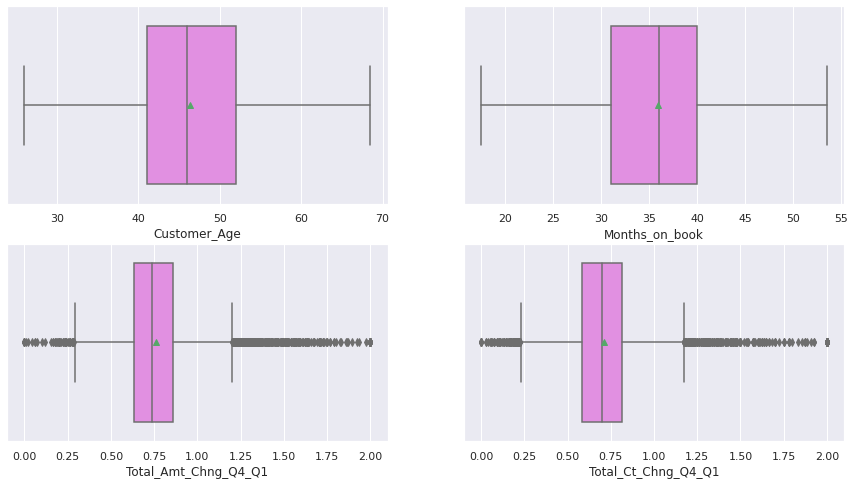

In [130]:
outlier_clip("Customer_Age")
outlier_clip("Months_on_book")
outlier_clip("Total_Amt_Chng_Q4_Q1", bound_left = 0, bound_right = 2.0)
outlier_clip("Total_Ct_Chng_Q4_Q1", bound_left = 0, bound_right = 2.0)

plt.figure(figsize = (15,8))
for i, col in enumerate(["Customer_Age", "Months_on_book", "Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1"]):
    plt.subplot(2,2,i + 1)
    sns.boxplot(x = df[col], color ="violet", showmeans = True)

**Missing Value Treatment**

15% of `Education_Level`, 7.4% of `Marital_Status` and 10.98% of `Income_Category` values are assigned "Unknown". Treat them as missing values and try to impute them with KNNImputer.

**Convert Unknown to NaN**

In [131]:
df.replace({"Unknown": np.nan}, inplace = True)
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Churned                        0
dtype: int64

**Convert categorical values into integers**

In [132]:
# define categorical columns that need to convert to integers
transform_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# define categorical values and indices
values_index_list = [ (["M", "F"], [1, 2]),                                                                                                       # gender
    (["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"], [1,2,3,4,5,6]),   # education
    (["Single", "Married", "Divorced"], [1,2,3]),                                                                                              # marital
    (["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"], [1,2,3,4,5]),               # income
    (["Blue", "Silver", "Gold", "Platinum"], [1,2,3,4])                                                                                      # card
    ]

for i, col in enumerate(transform_cols):
    df[col].replace(to_replace = values_index_list[i][0], value = values_index_list[i][1], inplace = True)

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0  Existing Customer        45.000       1                3            2.000   
1  Existing Customer        49.000       2                5            4.000   
2  Existing Customer        51.000       1                3            4.000   
3  Existing Customer        40.000       2                4            2.000   
4  Existing Customer        40.000       1                3            1.000   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0           2.000            3.000              1          39.000   
1           1.000            1.000              1          44.000   
2           2.000            4.000              1          36.000   
3             NaN            1.000              1          34.000   
4           2.000            3.000              1          21.000   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0     12691.000                  777                 1.335             1144   
1      8256.000                  864                 1.541             1291   
2      3418.000                    0                 2.000             1887   
3      3313.000                 2517                 1.405             1171   
4      4716.000                    0                 2.000              816   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Churned  
0              42                1.625                  0.061        0  
1              33                2.000                  0.105        0  
2              20                2.000                  0.000        0  
3              20                2.000                  0.760        0  
4              28                2.000                  0.000        0

**Split Data and Imputation**

In [133]:
seed = 1   # seed for randomness
X = df.drop(columns = ["Attrition_Flag", "Churned"])
y = df["Churned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = seed)  # split data into train and test set

In [134]:
X_train.head()    # check X_train before imputation

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
4124        50.000       2                1            4.000           2.000   
4686        50.000       1                0              NaN           3.000   
1276        26.000       2                0            4.000           1.000   
6119        65.000       2                0            3.000           1.000   
2253        46.000       1                3            4.000           1.000   

      Income_Category  Card_Category  Months_on_book  \
4124              NaN              1          43.000   
4686            3.000              1          36.000   
1276            2.000              1          17.500   
6119            1.000              1          53.500   
2253            4.000              1          35.000   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
4124                         6                       1                      2   
4686                         3                       3                      2   
1276                         6                       3                      4   
6119                         3                       3                      0   
2253                         6                       3                      4   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
4124      7985.000                    0                 1.032   
4686      5444.000                 2499                 0.468   
1276      1643.000                 1101                 0.713   
6119      2022.000                    0                 0.579   
2253      4930.000                    0                 1.019   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
4124             3873              72                0.674   
4686             4509              80                0.667   
1276             2152              50                0.471   
6119             4623              65                0.548   
2253             3343              77                0.638   

      Avg_Utilization_Ratio  
4124                  0.000  
4686                  0.459  
1276                  0.670  
6119                  0.000  
2253                  0.000

In [135]:
X_test.head()    # check X_test before imputation

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
7403        38.000       1                0              NaN           2.000   
2005        39.000       1                2            1.000           2.000   
8270        45.000       1                4            6.000           2.000   
646         41.000       1                3            4.000           1.000   
1690        65.000       2                1              NaN           1.000   

      Income_Category  Card_Category  Months_on_book  \
7403            3.000              1          26.000   
2005            5.000              1          26.000   
8270            4.000              1          39.000   
646             4.000              1          26.000   
1690            2.000              1          48.000   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
7403                         5                       2                      1   
2005                         2                       3                      4   
8270                         2                       3                      2   
646                          4                       3                      2   
1690                         4                       2                      4   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
7403      3809.000                 1521                 0.692   
2005      8906.000                    0                 0.315   
8270      1438.300                 1162                 0.539   
646      11806.000                 1811                 0.754   
1690      4599.000                  637                 0.622   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
7403             4666              69                0.865   
2005              809              15                0.250   
8270             4598              86                0.623   
646              1465              31                0.476   
1690             2608              78                0.592   

      Avg_Utilization_Ratio  
7403                  0.399  
2005                  0.000  
8270                  0.808  
646                   0.153  
1690                  0.139

In [136]:
# define imputer
imputer = KNNImputer()

# imputing and convert X_train, X_test to dataframe
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(data = imputer.transform(X_test), columns = X_test.columns)

# convert back to categorical values
for i, col in enumerate(transform_cols):
    X_train[col] = np.round(X_train[col])
    X_train[col].replace(to_replace = values_index_list[i][1], value = values_index_list[i][0], inplace = True)

for i, col in enumerate(transform_cols):
    X_test[col] = np.round(X_test[col])
    X_test[col].replace(to_replace = values_index_list[i][1], value = values_index_list[i][0], inplace = True)
    
print(X_train.isnull().sum())    # check missing values in X_train
print("\n")
print(X_test.isnull().sum())    # check missing values in X_test

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt          

In [137]:
X_train.head()  # check X_train after imputation and transformation

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0        50.000      F            1.000        Graduate        Married   
1        50.000      M            0.000         College       Divorced   
2        26.000      F            0.000        Graduate         Single   
3        65.000      F            0.000         College         Single   
4        46.000      M            3.000        Graduate         Single   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $40K - $60K          Blue          43.000                     6.000   
1     $60K - $80K          Blue          36.000                     3.000   
2     $40K - $60K          Blue          17.500                     6.000   
3  Less than $40K          Blue          53.500                     3.000   
4    $80K - $120K          Blue          35.000                     6.000   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   1.000                  2.000      7985.000   
1                   3.000                  2.000      5444.000   
2                   3.000                  4.000      1643.000   
3                   3.000                  0.000      2022.000   
4                   3.000                  4.000      4930.000   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                0.000                 1.032         3873.000          72.000   
1             2499.000                 0.468         4509.000          80.000   
2             1101.000                 0.713         2152.000          50.000   
3                0.000                 0.579         4623.000          65.000   
4                0.000                 1.019         3343.000          77.000   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                0.674                  0.000  
1                0.667                  0.459  
2                0.471                  0.670  
3                0.548                  0.000  
4                0.638                  0.000

In [138]:
X_test.head()   # check X_test after imputation and transformation

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0        38.000      M            0.000        Graduate        Married   
1        39.000      M            2.000      Uneducated        Married   
2        45.000      M            4.000       Doctorate        Married   
3        41.000      M            3.000        Graduate         Single   
4        65.000      F            1.000        Graduate         Single   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue          26.000                     5.000   
1         $120K +          Blue          26.000                     2.000   
2    $80K - $120K          Blue          39.000                     2.000   
3    $80K - $120K          Blue          26.000                     4.000   
4     $40K - $60K          Blue          48.000                     4.000   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   2.000                  1.000      3809.000   
1                   3.000                  4.000      8906.000   
2                   3.000                  2.000      1438.300   
3                   3.000                  2.000     11806.000   
4                   2.000                  4.000      4599.000   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             1521.000                 0.692         4666.000          69.000   
1                0.000                 0.315          809.000          15.000   
2             1162.000                 0.539         4598.000          86.000   
3             1811.000                 0.754         1465.000          31.000   
4              637.000                 0.622         2608.000          78.000   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                0.865                  0.399  
1                0.250                  0.000  
2                0.623                  0.808  
3                0.476                  0.153  
4                0.592                  0.139

In [139]:
for col in X_train.select_dtypes("object").columns:   # check values in categorical column
    print(X_train[col].value_counts())
    print()

F    3770
M    3318
Name: Gender, dtype: int64

Graduate         2444
High School      1621
College          1306
Uneducated       1035
Post-Graduate     370
Doctorate         312
Name: Education_Level, dtype: int64

Married     3645
Single      2940
Divorced     503
Name: Marital_Status, dtype: int64

Less than $40K    2634
$40K - $60K       1512
$80K - $120K      1225
$60K - $80K       1202
$120K +            515
Name: Income_Category, dtype: int64

Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64



In [140]:
for col in X_test.select_dtypes("object").columns:     # check values in categorical column
    print(X_test[col].value_counts())
    print()

F    1588
M    1451
Name: Gender, dtype: int64

Graduate         1067
High School       669
College           546
Uneducated        460
Post-Graduate     158
Doctorate         139
Name: Education_Level, dtype: int64

Married     1544
Single      1249
Divorced     246
Name: Marital_Status, dtype: int64

Less than $40K    1123
$40K - $60K        671
$80K - $120K       508
$60K - $80K        506
$120K +            231
Name: Income_Category, dtype: int64

Blue        2815
Silver       180
Gold          38
Platinum       6
Name: Card_Category, dtype: int64



**Convert categorical columns to one hot encoding**

In [141]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0        50.000            1.000          43.000                     6.000   
1        50.000            0.000          36.000                     3.000   
2        26.000            0.000          17.500                     6.000   
3        65.000            0.000          53.500                     3.000   
4        46.000            3.000          35.000                     6.000   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   1.000                  2.000      7985.000   
1                   3.000                  2.000      5444.000   
2                   3.000                  4.000      1643.000   
3                   3.000                  0.000      2022.000   
4                   3.000                  4.000      4930.000   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                0.000                 1.032         3873.000          72.000   
1             2499.000                 0.468         4509.000          80.000   
2             1101.000                 0.713         2152.000          50.000   
3                0.000                 0.579         4623.000          65.000   
4                0.000                 1.019         3343.000          77.000   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
0                0.674                  0.000         0   
1                0.667                  0.459         1   
2                0.471                  0.670         0   
3                0.548                  0.000         0   
4                0.638                  0.000         1   

   Education_Level_Doctorate  Education_Level_Graduate  \
0                          0                         1   
1                          0                         0   
2                          0                         1   
3                          0                         0   
4                          0                         1   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   Education_Level_Uneducated  Marital_Status_Married  Marital_Status_Single  \
0                           0                       1                      0   
1                           0                       0                      0   
2                           0                       0                      1   
3                           0                       0                      1   
4                           0                       0                      1   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            1                            0   
1                            0                            1   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               1   
4                             1                               0   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0                   0                       0                     0  
1                   0                       0                     0  
2                   0                       0                     0  
3           

In [142]:
X_test = pd.get_dummies(X_test, drop_first = True)
X_test.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0        38.000            0.000          26.000                     5.000   
1        39.000            2.000          26.000                     2.000   
2        45.000            4.000          39.000                     2.000   
3        41.000            3.000          26.000                     4.000   
4        65.000            1.000          48.000                     4.000   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   2.000                  1.000      3809.000   
1                   3.000                  4.000      8906.000   
2                   3.000                  2.000      1438.300   
3                   3.000                  2.000     11806.000   
4                   2.000                  4.000      4599.000   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             1521.000                 0.692         4666.000          69.000   
1                0.000                 0.315          809.000          15.000   
2             1162.000                 0.539         4598.000          86.000   
3             1811.000                 0.754         1465.000          31.000   
4              637.000                 0.622         2608.000          78.000   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
0                0.865                  0.399         1   
1                0.250                  0.000         1   
2                0.623                  0.808         1   
3                0.476                  0.153         1   
4                0.592                  0.139         0   

   Education_Level_Doctorate  Education_Level_Graduate  \
0                          0                         1   
1                          0                         0   
2                          1                         0   
3                          0                         1   
4                          0                         1   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   Education_Level_Uneducated  Marital_Status_Married  Marital_Status_Single  \
0                           0                       1                      0   
1                           1                       1                      0   
2                           0                       1                      0   
3                           0                       0                      1   
4                           0                       0                      1   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            0                            1   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            1                            0   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                             0                               0   
1                             0                               0   
2                             1                               0   
3                             1                               0   
4                             0                               0   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0                   0                       0                     0  
1                   0                       0                     0  
2                   0                       0                     0  
3           

## Model Building and Evaludation

### Evaluation metrics
We could make two types of errors in prediction:
1. Type 1 error (false positive): When the cusomer doesn't want to churn and we predict she/he will churn. We would not suffer any loss in this case.
2. Type 2 error (false negative): When the customer plans to churn and we predict she/he won't. We could lose a customer and the revenue related to her/his use of our credit card.

Obviously we should prevent case 2 happening and maximize the recall score in order to identify as many churned customers as possible.

In [143]:
def compute_metrics(model, X_train, X_test, y_train, y_test):
    """
    This function is to compute accuracy, recall, precision and f1 score for both training set and test set.
    
    Input:
    model: model before fitting.
    X_train: independent variables of training set. Dimension: (m, k).
    y_train: true class labels of training set. Dimension: (m, ).    
    X_test: independent variables of test set. Dimension: (n, k).
    y_test: true class labels of test set. Dimension: (n, ). 


    Return:
    A model fitted with training set. Predictions and a dataframe of metrics for both training and test set.
    """    
    model = model.fit(X_train, y_train)
  
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    metrics_df = pd.DataFrame([accuracy_train, accuracy_test, recall_train, recall_test, 
                                                          precision_train, precision_test, f1_train, f1_test],
                                                 index = ["Accuracy Train", "Accuracy Test", "Recall Train", "Recall Test", 
                                                                    "Precision Train", "Precision Test", "F1 Train", "F1 Test"]).T
    
    return model, y_pred_train, y_pred_test, metrics_df

In [144]:
def generate_confusion_matrix(y_true, y_pred, labels = [0, 1]):
    """
    This function is to plot the confusion matrix as a heatmap.
    
    Input:
    y_true: true class labels.
    y_pred: predicted class labels.
    labels: a list of class labels.
    
    Return:
    None.
    """
    matrix = confusion_matrix(y_true, y_pred, labels = labels)  # return a n_class x n_class ndarray, i-th row and j-th column entry 
                                                                                                 # indicates the number of samples with true label being i-th class 
                                                                                                 # and predicted label being j-th class.
    matrix_df = pd.DataFrame(matrix)
    
    group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]   # absolute value
    group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]    # percent
    plot_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    plot_labels = np.asarray(plot_labels).reshape(2,2)   # reshape into a n_class x n_class ndarray
    
    plt.figure(figsize = (7,5))
    sns.heatmap(matrix_df, annot = plot_labels, fmt='')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')

In [145]:
# set display format for dataframe
pd.set_option('display.float_format', '{:0.3f}'.format)

cv_results = {} # key: model name, value: CV recall scores

# set scorer as recall
scorer = "recall"

# kfold as 5
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

### Iteration 1
### Logistic Regression
**(1) Default Setting**

As we see, some predictors such as `Credit_Limit` have a wide range, while other predictors such as `Avg_Utilization_Ratio` have a very small range. We could apply standard scaling to convert all predictors to a similar range.

In [146]:
# columns that need standard scaling
scaling_cols =  ["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal", "Total_Trans_Amt", "Total_Trans_Ct"]

mean: 0.5865020480717211 
minimum: 0.5394736842105263 
maximum: 0.6666666666666666


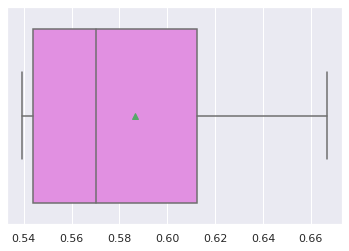

In [147]:
# only do standard scaling to specific columns, other columns are passed through
column_transformer = ColumnTransformer(transformers = [("standard_scaler", StandardScaler(), scaling_cols)], remainder = "passthrough", n_jobs = -1)

# pipeline that consists of a column transformer and a logistic regression
lr_default = make_pipeline(column_transformer, LogisticRegression(random_state = seed, n_jobs = -1))
res = cross_val_score(estimator = lr_default, X= X_train, y = y_train, scoring = scorer, n_jobs=-1, cv = kfold)  # cross validation with 5 folds
cv_results["LR_default"] = res

# plot the box plot of recalls and print the mean/ min/ max
sns.boxplot(x = res, showmeans = True, color = "violet");
print("mean:", res.mean(), "\nminimum:", res.min(), "\nmaximum:",res.max())

Under default setting, recall score is 0.54 - 0.67, the mean is 0.58.

In [148]:
lr_default, y_pred_train, y_pred_test, metrics = compute_metrics(lr_default, X_train, X_test, y_train, y_test)
metrics

Accuracy Train  Accuracy Test  Recall Train  Recall Test  Precision Train  \
0           0.906          0.901         0.591        0.564            0.774   

   Precision Test  F1 Train  F1 Test  
0           0.755     0.670    0.646

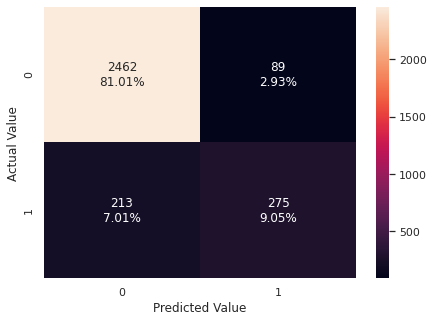

In [149]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

The model generalizes well with train and test set. Test accuracy is 0.901. Test recall is 0.564. Accuracy is high but recall could be further improved.

**(2) Upsampling**

In [150]:
print("Before upsampling, the number of class 1:", len(y_train[y_train == 1]))
print("Before upsampling, the number of class 0:", len(y_train[y_train == 0]))

Before upsampling, the number of class 1: 1139
Before upsampling, the number of class 0: 5949


In [151]:
X_train_up, y_train_up= SMOTE(random_state=seed, k_neighbors=5, n_jobs=-1).fit_resample(X_train, y_train)
print("After upsampling, the number of class 1:", len(y_train_up[y_train_up == 1]))
print("After upsampling, the number of class 0:", len(y_train_up[y_train_up == 0]))
print("After upsampling, the shape of X_train:", X_train_up.shape)

After upsampling, the number of class 1: 5949
After upsampling, the number of class 0: 5949
After upsampling, the shape of X_train: (11898, 28)


mean: 0.9067068576799938 
minimum: 0.9033613445378151 
maximum: 0.9092436974789916


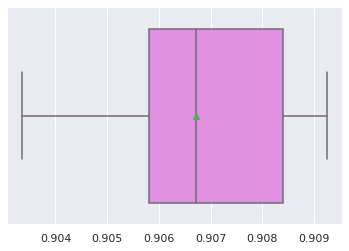

In [152]:
lr_up = make_pipeline(column_transformer, LogisticRegression(random_state = seed, n_jobs = -1))
res = cross_val_score(estimator = lr_up, X= X_train_up, y = y_train_up, scoring = scorer, n_jobs=-1, cv = kfold)
cv_results["LR_up"] = res

sns.boxplot(x = res, showmeans = True, color = "violet");
print("mean:", res.mean(), "\nminimum:", res.min(), "\nmaximum:",res.max())

With upsampling, recall score increases to greater than 0.9 based on the cross validation result of training set.

In [153]:
lr_up, y_pred_train, y_pred_test, metrics = compute_metrics(lr_up, X_train_up, X_test, y_train_up, y_test)
metrics

Accuracy Train  Accuracy Test  Recall Train  Recall Test  Precision Train  \
0           0.913          0.880         0.907        0.701            0.918   

   Precision Test  F1 Train  F1 Test  
0           0.609     0.913    0.651

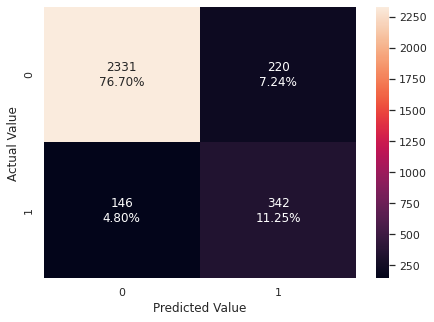

In [154]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

Although test recall is improved, the model is overfitting. Test accuracy is 0.880, slightly lower than default setting. Test recall is 0.701, higher than default setting.

**(3) Downsampling**

In [155]:
print("Before downsampling, the number of class 1:", len(y_train[y_train == 1]))
print("Before downsampling, the number of class 0:", len(y_train[y_train == 0]))

Before downsampling, the number of class 1: 1139
Before downsampling, the number of class 0: 5949


In [156]:
X_train_down, y_train_down = RandomUnderSampler(sampling_strategy = 1.0, random_state = seed).fit_resample(X_train, y_train)
print("After downsampling, the number of class 1:", len(y_train_down[y_train_down == 1]))
print("After downsampling, the number of class 0:", len(y_train_down[y_train_down == 0]))
print("After downsampling, the shape of X_train:", X_train_down.shape)

After downsampling, the number of class 1: 1139
After downsampling, the number of class 0: 1139
After downsampling, the shape of X_train: (2278, 28)


mean: 0.8367107195301028 
minimum: 0.8114035087719298 
maximum: 0.8596491228070176


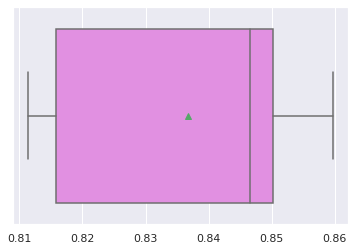

In [157]:
lr_down = make_pipeline(column_transformer, LogisticRegression(random_state = seed, n_jobs = -1))
res = cross_val_score(estimator = lr_down, X= X_train_down, y = y_train_down, scoring = scorer, n_jobs=-1, cv = kfold)
cv_results["LR_down"] = res

sns.boxplot(x = res, showmeans = True, color = "violet");
print("mean:", res.mean(), "\nminimum:", res.min(), "\nmaximum:",res.max())

Compared to default setting, after downsampling, recall score increases to 0.83 based on the cross validation result of training set.

In [158]:
lr_down, y_pred_train, y_pred_test, metrics = compute_metrics(lr_down, X_train_down, X_test, y_train_down, y_test)
metrics

Accuracy Train  Accuracy Test  Recall Train  Recall Test  Precision Train  \
0           0.838          0.844         0.838        0.850            0.838   

   Precision Test  F1 Train  F1 Test  
0           0.509     0.838    0.637

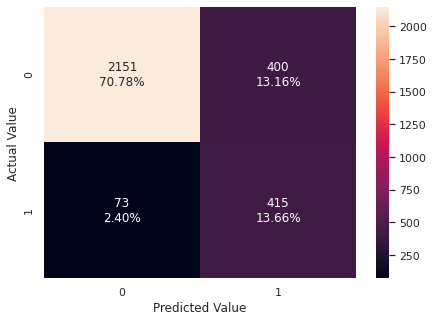

In [159]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

The model generalizes well on train and test set in terms of accuracy and recall. Test accuracy is 0.844, slightly lower than default setting. Test recall is 0.850, higher than default setting.

**(4) Regulaization with upsampling**

Let's try to fix the overfitting in upsampling model.

mean: 0.8972929726979102 
minimum: 0.8873949579831932 
maximum: 0.9042016806722689


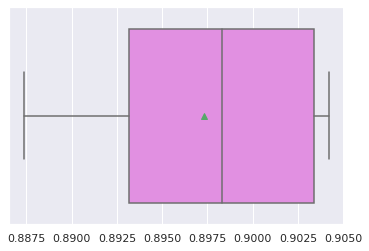

In [160]:
 # C is the Inverse of regularization strength, set C to a small floating point number
lr_up_reg = make_pipeline(column_transformer, LogisticRegression(C = 0.01, random_state = seed, n_jobs = -1))
res = cross_val_score(estimator = lr_up_reg, X= X_train_up, y = y_train_up, scoring = scorer, n_jobs=-1, cv = kfold)
cv_results["LR_up_reg"] = res

sns.boxplot(x = res, showmeans = True, color = "violet");
print("mean:", res.mean(), "\nminimum:", res.min(), "\nmaximum:",res.max())

With upsampling and regularization, recall score is 0.897 based on the cross validation result of training set.

In [161]:
lr_up_reg, y_pred_train, y_pred_test, metrics = compute_metrics(lr_up_reg, X_train_up, X_test, y_train_up, y_test)
metrics

Accuracy Train  Accuracy Test  Recall Train  Recall Test  Precision Train  \
0           0.902          0.875         0.900        0.744            0.904   

   Precision Test  F1 Train  F1 Test  
0           0.588     0.902    0.657

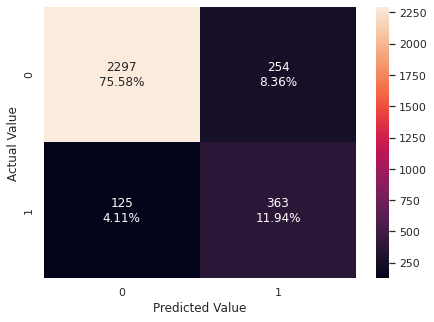

In [162]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

The model is still overfitting, but the overfitting is reduced compared to only applying upsampling. Test accuracy is 0.875, slightly lower than the case of only upsampling. Test recall is 0.744, higher than case of only upsampling.

### Bagging and Boosting

In [163]:
dtree = make_pipeline(column_transformer, DecisionTreeClassifier(random_state = seed))
rf = make_pipeline(column_transformer, RandomForestClassifier(random_state = seed, n_jobs=-1))
bgc = make_pipeline(column_transformer, BaggingClassifier(random_state = seed, n_jobs=-1))
adc = make_pipeline(column_transformer, AdaBoostClassifier(random_state = seed))
gbc = make_pipeline(column_transformer, GradientBoostingClassifier(random_state = seed))
xgb = make_pipeline(column_transformer, XGBClassifier(objective='binary:logistic', booster = 'gbtree', random_state = seed, n_jobs=-1))

tree_ensemble_models = [dtree, rf, bgc, adc, gbc, xgb]
tree_ensemble_names = [ "DTREE", "RF", "BGC", "ADC","GBC", "XGB" ]

# run cross validation on each model
for i, model in enumerate(tree_ensemble_models):
    res = cross_val_score(estimator = model, X= X_train, y = y_train, scoring = scorer, n_jobs=-1, cv = kfold)
    cv_results[tree_ensemble_names[i]] = res

### Conclusion of Iteration 1

LR_default:  0.5865020480717211
LR_up:  0.9067068576799938
LR_down:  0.8367107195301028
LR_up_reg:  0.8972929726979102
DTREE:  0.789268877038411
RF:  0.7866527552361079
BGC:  0.818243295463328
ADC:  0.8331942190277456
GBC:  0.8296583970940568
XGB:  0.8665468737924105


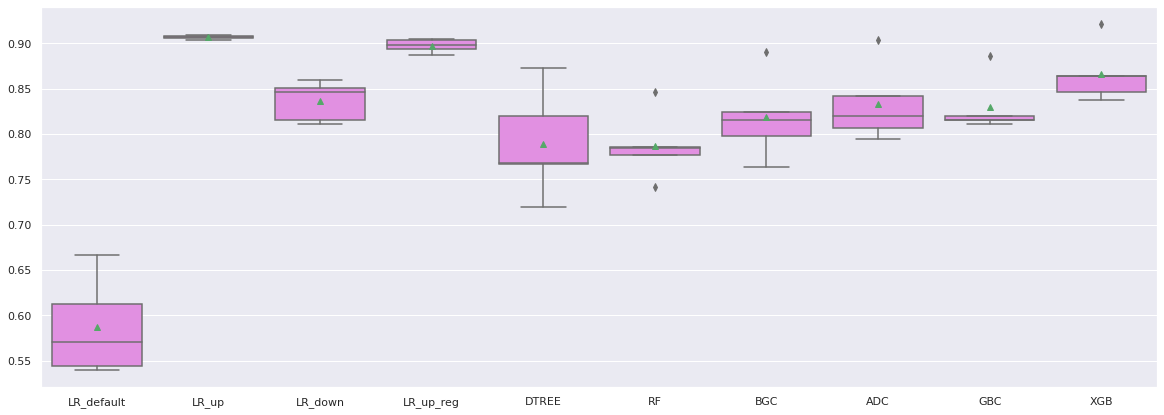

In [166]:
plt.figure(figsize=(20,7))
sns.boxplot(data = list(cv_results.values()), showmeans = True, color = "violet");  # compare recall score computed by cross validation
plt.xticks(np.arange(len(list(cv_results.keys()))), list(cv_results.keys()));

for name, res in cv_results.items():
    print(name + ": ", res.mean())

- LR_up, LR_up_reg and XGB are the best three models. 
- Due to time complexity issues of XGBoost, we use AdaBoost instead. Let's do hyperparameter tuning on these three models.

### Iteration 2

In [167]:
# model metrics. Dictionary, key: model name, value: metrics dataframe of that model
models = {}

#### AdaBoost

**GridSearchCV**

In [168]:
Adc_grid_tuned = make_pipeline(column_transformer, AdaBoostClassifier(random_state = seed))
param_grid = {
    'adaboostclassifier__base_estimator': [
        DecisionTreeClassifier(random_state = seed, max_depth = 1),         
        DecisionTreeClassifier(random_state = seed, max_depth = 2), 
        DecisionTreeClassifier(random_state = seed, max_depth = 3), 
        DecisionTreeClassifier(random_state = seed, max_depth = 4),
    ],
    'adaboostclassifier__n_estimators': np.arange(50,150, 20),
    'adaboostclassifier__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],    
}
clf = GridSearchCV(estimator = Adc_grid_tuned, param_grid = param_grid, scoring = scorer, cv = kfold, n_jobs = -1).fit(X_train, y_train)
print("best estimator: ", clf.best_estimator_)
print("\nbest recall score: ", clf.best_score_)

best estimator:  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.5, n_estimators=130,
                          

In [169]:
Adc_grid_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["AdaBoost_GridSearchCV"] = metrics.copy()
metrics

Accuracy Train  Accuracy Test  Recall Train  Recall Test  Precision Train  \
0           0.992          0.976         0.970        0.926            0.980   

   Precision Test  F1 Train  F1 Test  
0           0.926     0.975    0.926

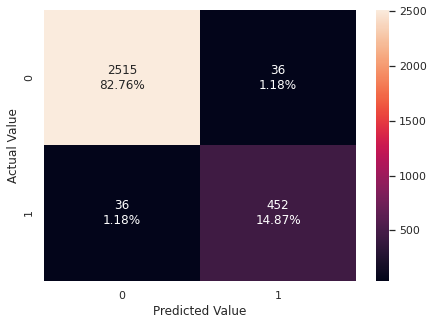

In [170]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

**RandomizedSearchCV**

In [171]:
Adc_rand_tuned = make_pipeline(column_transformer, AdaBoostClassifier(random_state = seed))
param_rand = {
    'adaboostclassifier__base_estimator': [
        DecisionTreeClassifier(random_state = seed, max_depth = 1), 
        DecisionTreeClassifier(random_state = seed, max_depth = 2), 
        DecisionTreeClassifier(random_state = seed, max_depth = 3), 
        DecisionTreeClassifier(random_state = seed, max_depth = 4),
    ],
    'adaboostclassifier__n_estimators': randint(50,150),
    'adaboostclassifier__learning_rate': np.linspace(0,1, 40),    
}
clf = RandomizedSearchCV(estimator = Adc_rand_tuned, param_distributions = param_rand, n_iter=50, scoring = scorer, cv = kfold, 
                         n_jobs = -1, random_state = seed).fit(X_train, y_train)
print("best estimator: ", clf.best_estimator_)
print("\nbest recall score: ", clf.best_score_)

best estimator:  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.3076923076923077,
                             

In [172]:
Adc_rand_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["AdaBoost_RandomizedSearchCV"] = metrics.copy()
metrics

Accuracy Train  Accuracy Test  Recall Train  Recall Test  Precision Train  \
0           0.984          0.976         0.934        0.914            0.966   

   Precision Test  F1 Train  F1 Test  
0           0.933     0.950    0.923

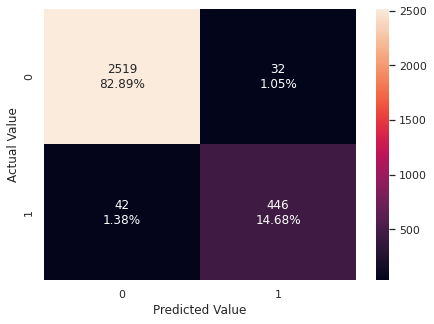

In [173]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [174]:
compare = pd.concat(models.values())   # compare metrics
compare["Model"] = models.keys()
compare.set_index("Model").sort_values(by = 'Recall Test', ascending = False)    # sort the model in descending order based on test recall score

Accuracy Train  Accuracy Test  Recall Train  \
Model                                                                      
AdaBoost_GridSearchCV                 0.992          0.976         0.970   
AdaBoost_RandomizedSearchCV           0.984          0.976         0.934   

                             Recall Test  Precision Train  Precision Test  \
Model                                                                       
AdaBoost_GridSearchCV              0.926            0.980           0.926   
AdaBoost_RandomizedSearchCV        0.914            0.966           0.933   

                             F1 Train  F1 Test  
Model                                           
AdaBoost_GridSearchCV           0.975    0.926  
AdaBoost_RandomizedSearchCV     0.950    0.923

## Conclusion
- Churned customers hold fewer products from our bank and have lower credit limit/ revolving balance/ average utilization ratio compared to non-churned groups.
- The churn rate is the highest for customers that're inactive for 0 month and lowest for customers that're inactive for 1 month. Customers inactive for 4 months are the category with the second highest churn rate.
- The churn rate increases with the number of contacts made by customer during the last 12 months.When the number of contacts reaches 6, churn rate is 100%.
- Churned customers tend to use our credit card less than non-churned group.
- Churn rate doesn't differ much between genders. It is slightly higher for female.
- Churn rate is the highest for customers with a doctor's degree or Platinum card holders.
- Generally speaking, females are assigned a lower credit limit than males. Maybe because female have lower income than male and credit limit is positively correlated to income. For male, churned and non-churned groups have similar distribution of credit limit. For female, the churned group has lower credit limit than non-churned group. And for all income categories with female customers, females show higher churn rate than males.
- For Platinum card, female shows a churn rate more than 40%. For Blue card and Gold card, female is slightly more likely to churn than male. For Silver card, male is more likely to churn than female.

## Recommendation
- Regular survey should be implemented to collect customers' feedback to our products and services. 
- The relationship between churn rate and the number of contacts indicates that customers may be driven by negative experience to contact our bank. We need to pay attention to their feedbacks, investigate and resolve their concerns.
- Platinum card holders are the most valuable customers since they're assgined the highest credit limit and with the highest income. But our data shows female Platinum card holders have a more than 40% churn rate, remarkably higher than their male counterparts. We should investigate the reason and resolve their concerns.


## To Be Removed
- Blue card is more favored by lower income customers, while Platinum card is more favored by higher income customers.

- Credit limits for different credit card holders are: Platinum > Gold > Silver > Blue.
- Average revolving balance:Gold > Platinum > Silver > Blue.
- Blue card holders have much higher utilization ratio compared to other card holders.

- Platinum card has the highest median customer age and Silver card has the lowest median customer age.
- Platinum card holders have the longest average period of relationship with our bank, followed by Blue card holders.
- The average contacts per customer for Platinum card is slightly higher than others.
- Blue card holders have the longest average inactive period. Platinum card holders have the shortest average inactive period.
- Blue card has more female users than male users, while the other three have more male users. Gold card has the highest male/ female ratio.

- Total transaction amount and total number of transactions during past year: Platinum > Gold > Silver > Blue.
- While `Total_Amt_Chng_Q4_Q1` is alike among all cards, `Total_Ct_Chng_Q4_Q1` for Platinum card is much lower.

- Married people and singles are the two major users for each credit card. Blue card has more married users than singles, while the other three have more single users.
